# Basic RCMES Workflow (example)

* Typical Steps:
    * Load Datasets
    * Temporal Regrid
    * Spatial Regrid
    * Configure Metrics
    * Evaluate Metrics
    * Plot Results
    


### Make sure that OCW is available.

In [1]:
%matplotlib inline
import ocw
from functions import commonLatLonGrid

### Load a Gridded Satellite Dataset

In [2]:
import ocw.data_source.local as local

path = "/Users/bdwilson/Documents/code/RCMES/Workshop/AFRICA_UC-WRF311_CTL_ERAINT_MM_50km-rg_1989-2008_tasmax.nc"
variable = "tasmax"
satellite_ds = local.load_file(path, variable)
print satellite_ds

<Dataset - name: None, lat-range: (-45.76, -24.64), lon-range: (-24.64, -24.64), time_range: (1989-01-15 00:00:00, 2008-12-15 00:00:00), var: tasmax, units: K>


### Load a Model Dataset


In [3]:
path = "/Users/bdwilson/Documents/code/RCMES/Workshop/AFRICA_KNMI-RACMO2.2b_CTL_ERAINT_MM_50km_1989-2008_tasmax.nc"
variable = "tasmax"
model_ds = local.load_file(path, variable)
print model_ds

<Dataset - name: None, lat-range: (-45.7599983215, -24.6399993896), lon-range: (-24.6399993896, -24.6399993896), time_range: (1989-01-01 00:00:00, 2008-12-01 00:00:00), var: tasmax, units: K>


### Temporal Regrid

In [4]:
import ocw.dataset_processor as dsp
from datetime import timedelta

timeRes=timedelta(days=365)
satellite_ds = dsp.temporal_rebin(satellite_ds, timeRes)
model_ds = dsp.temporal_rebin(model_ds, timeRes)
print satellite_ds
print model_ds

<Dataset - name: None, lat-range: (-45.76, -24.64), lon-range: (-24.64, -24.64), time_range: (1989-01-01 00:00:00, 2008-01-01 00:00:00), var: tasmax, units: K>
<Dataset - name: None, lat-range: (-45.7599983215, -24.6399993896), lon-range: (-24.6399993896, -24.6399993896), time_range: (1989-01-01 00:00:00, 2008-01-01 00:00:00), var: tasmax, units: K>


### Spatial Regrid

In [5]:
latRes = 1.0     # degrees
lonRes = 1.0     # degrees
lats, lons = commonLatLonGrid([satellite_ds, model_ds], latRes, lonRes)
# Find common spatial bounds, return desired grid with specified resolution

satellite_ds = dsp.spatial_regrid(satellite_ds, lats, lons)
model_ds = dsp.spatial_regrid(model_ds, lats, lons)

commonSpatialBounds: Dataset 0 has boundaries: lat (-45.76, 42.24), lon (-24.64, 60.28).
commonSpatialBounds: Dataset 1 has boundaries: lat (-45.7599983215, 42.2400016785), lon (-24.6399993896, 60.2799987793).
commonSpatialBounds: Common boundaries are: lat (-45.7599983215, 42.24), lon (-24.6399993896, 60.2799987793).


### Configure Metric(s) for Evaluation Object

In [6]:
import ocw.metrics as metrics
import ocw.evaluation as evaluation

metric = metrics.Bias()
eval = evaluation.Evaluation(satellite_ds, [model_ds], [metric])

### Evaluate Metrics

In [7]:
eval.run()
results = eval.results

### Plot Bias between two models as time-series of contour maps

In [8]:
import ocw.plotter as plotter

outputName = "wrf_bias_compared_to_knmi"
config = {'gridshape': (4, 5),
          'ptitle': 'TASMAX Bias of WRF Compared to KNMI (1989 - 2008)',
          'subtitles': range(1989, 2009, 1)
          }

plotter.draw_contour_map(results[0][0], lats, lons, outputName, 'png', **config)
plotFile = outputName + '.png'
print plotFile

wrf_bias_compared_to_knmi.png


/Users/bdwilson/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


### Display Plot

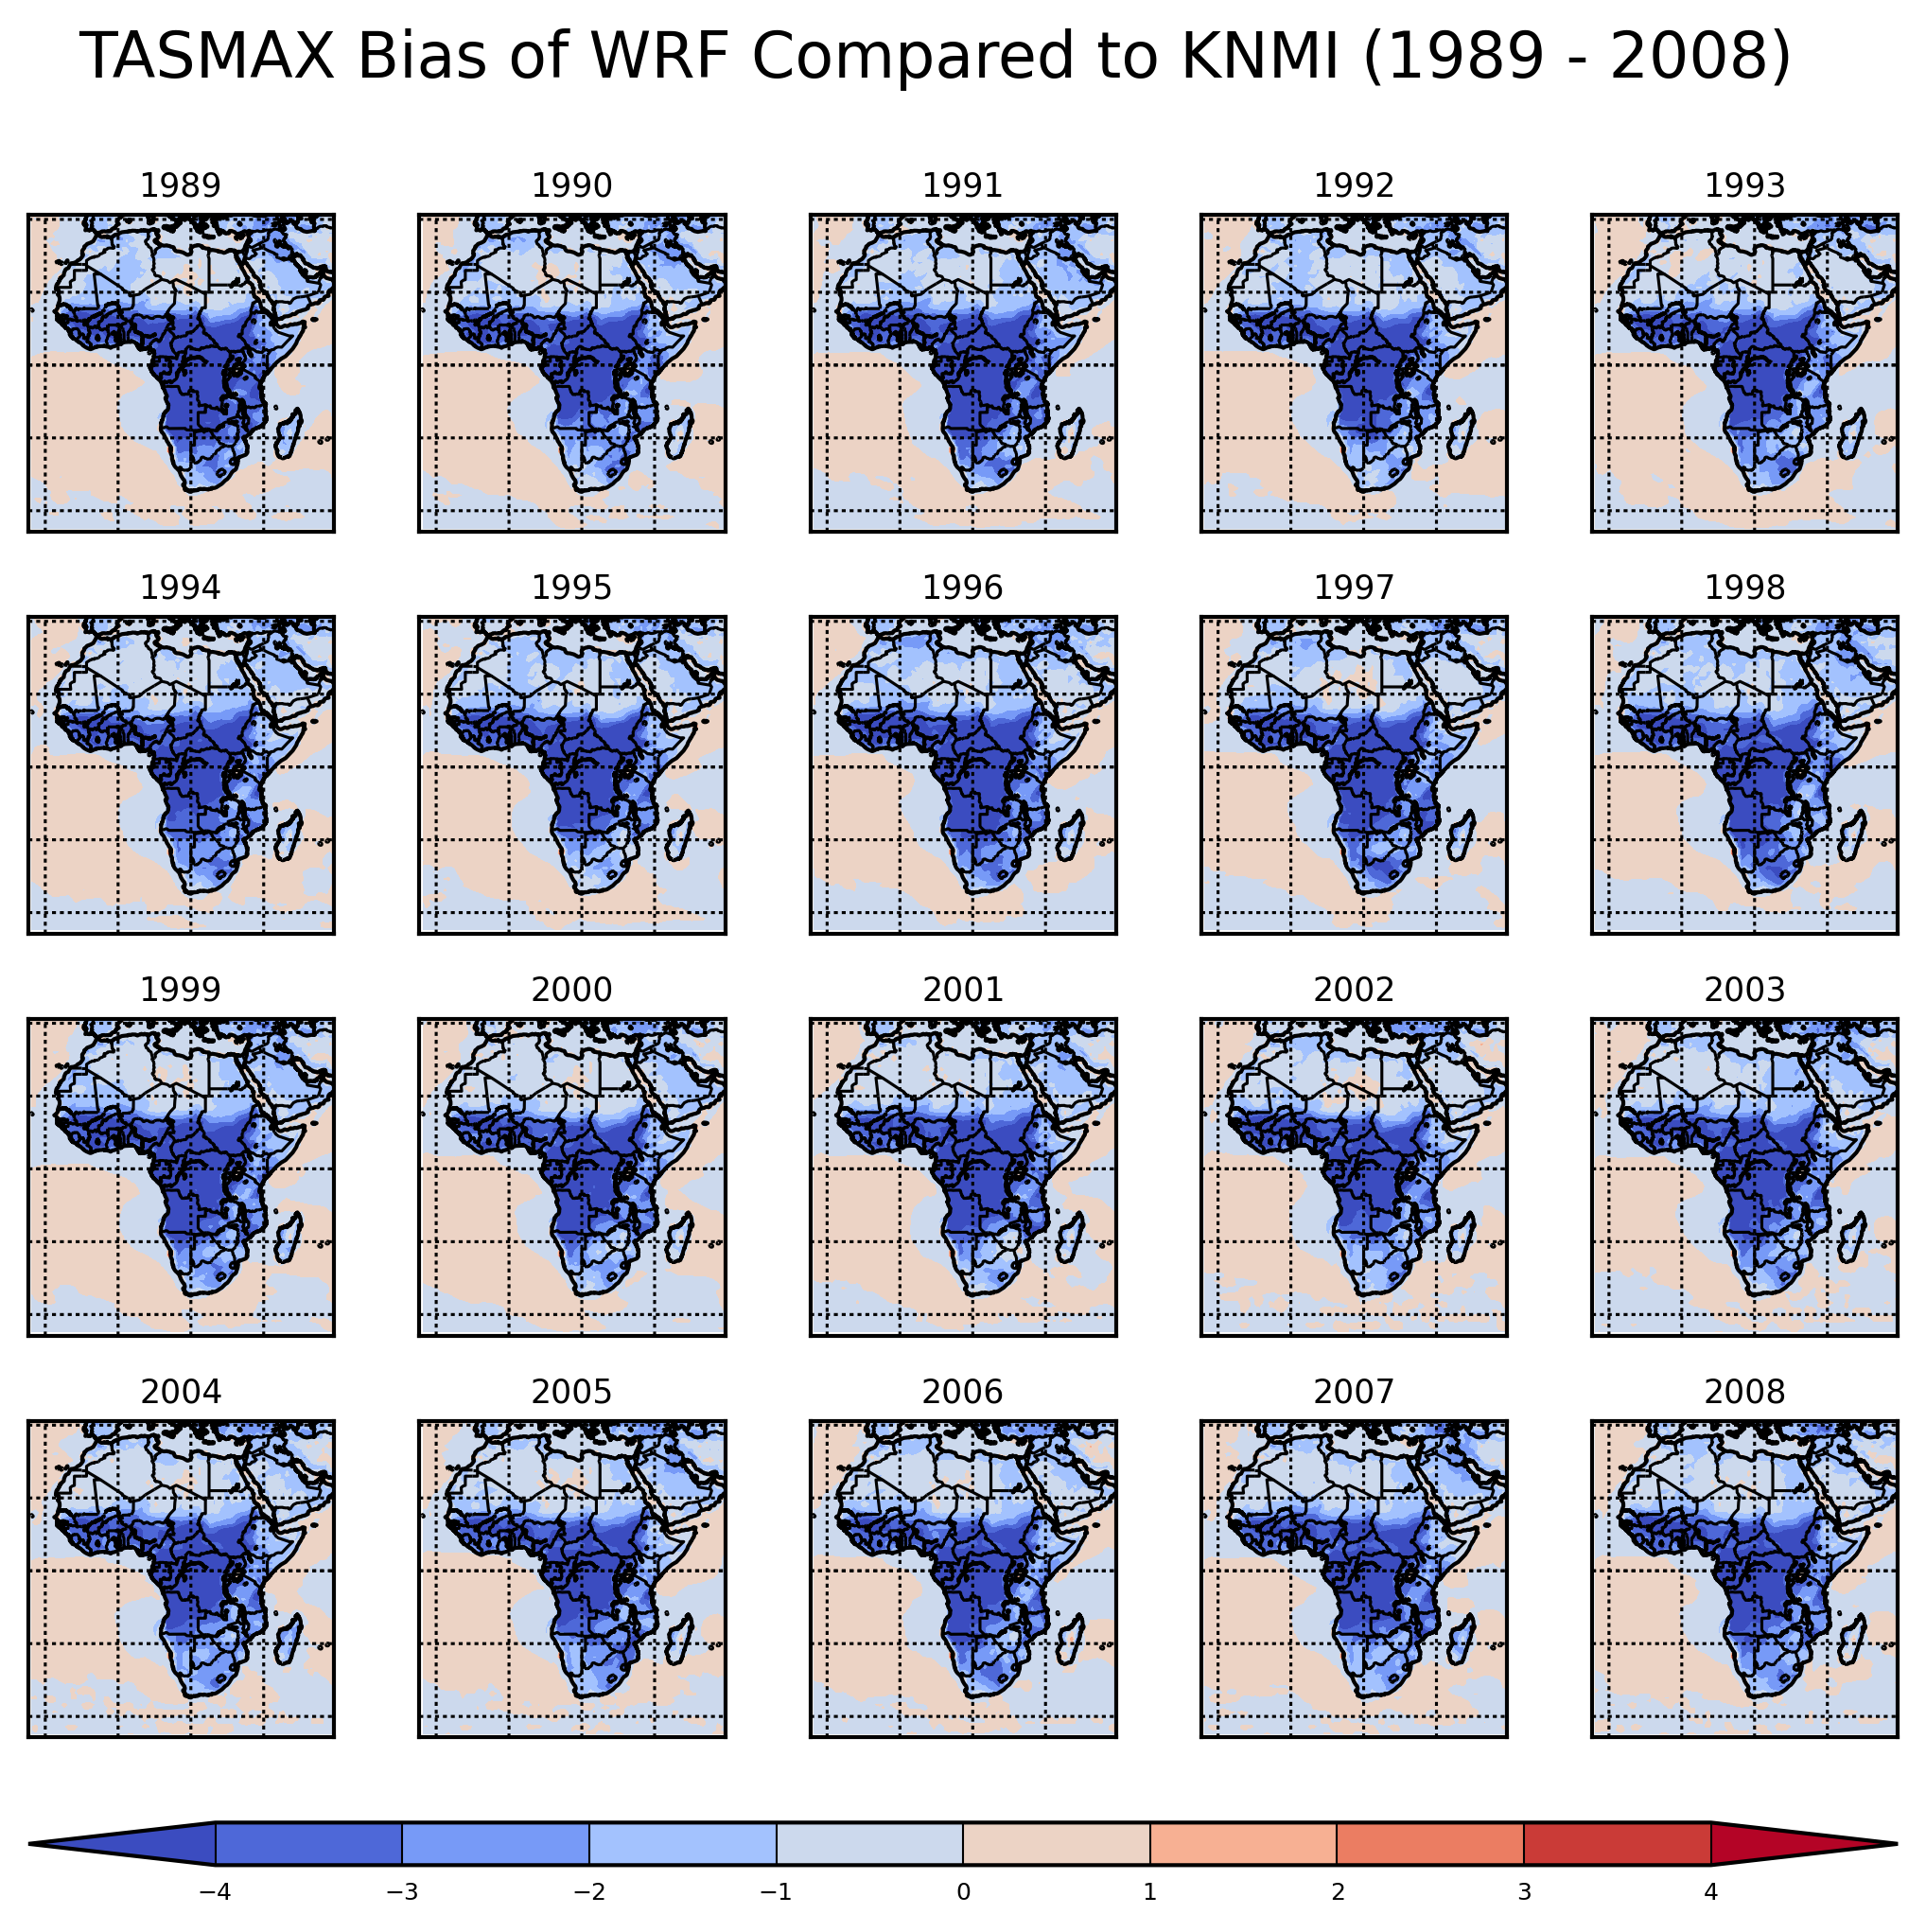

In [9]:
from IPython.display import Image, display

display(Image(plotFile))